In [1]:
import plotly.io as pio
pio.renderers.default = "notebook"

from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

import pandas as pd
import plotly.express as px
import plotly.offline as po
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import shapely
import geopandas as gpd
import folium
from plotly.subplots import make_subplots

import base64

images_path = 'content/'
data_path = 'data/'

# images_path = '/content/drive/MyDrive/VizWiz/'
# data_path = '/content/drive/MyDrive/VizWiz/'

image_path = images_path + 'schiphol.jpg'

with open(image_path, 'rb') as file:
    image_data = file.read()
    image_base64 = base64.b64encode(image_data).decode('utf-8')

from IPython.display import display, HTML
from PIL import Image
import matplotlib.pyplot as plt

---
#**De toekomst van Schiphol: Opstijgen of neerstorten?**
###*Een data-gedreven analyse van de uitdagingen en mogelijkheden*
---

*Namen*: Joost Weerheim, Nuno Scholten, Stephan Visser & Milan Tool

*Groep*: P1

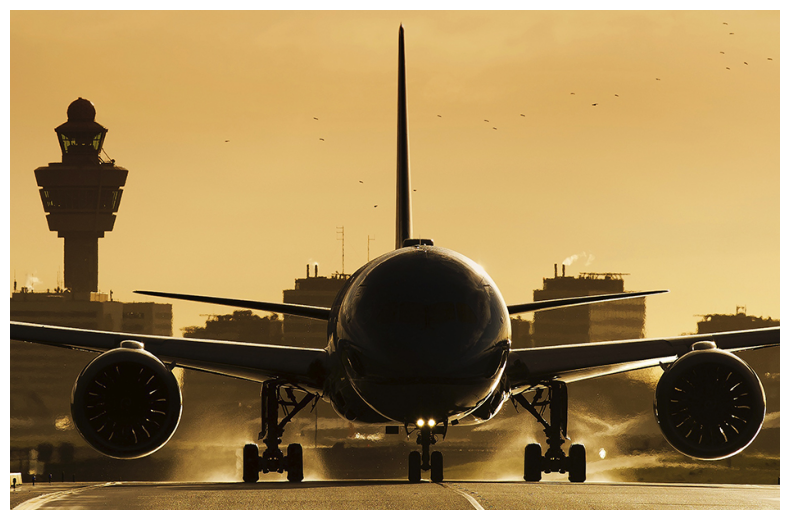

In [2]:
#@title
# Path to the Schiphol image
image_path = images_path + 'schiphol (1).jpg'
image = Image.open(image_path)
# Display the image centered
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')

# Automatically adjust spacing and center the image
plt.tight_layout()

# Show the plot
plt.show()

---



##  **1. Introductie**


---



Nog maar kort geleden werden 200 activisten opgepakt nadat ze een gedeelte van Schiphol blokkeerde. Dit incident trok veel aandacht in de media en onderstreepte de intensiteit van de controverse rondom de luchthaven.

Enerzijds is er bezorgheid over de milieu-impact. Vliegverkeer is verantwoordelijk voor CO2-emissies en draagt daarbij mee aan klimaatverandering. Het verminderen hiervan is erg belangrijk. Een ander belangrijk punt is geluidsoverlast voor omwonenden. Het toenemende vliegverkeer kan leiden tot meer lawaai in de directe omgeving van de luchthaven, wat de levenskwaliteit van de bewoners beïnvloedt.

Anderzijds wordt er gezegd dat Schiphol een belangrijke speler in de Nederlandse economie is. De groei van de luchthaven zorgt voor meer werkgelegenheid en draagt dus bij aan de economische welvaart van het land. Bovendien levert de groei van Schiphol belastingsinkomsten op, waarmee investeringen gedaan kunnen worden.

Waar politieke partijen zoals Groenlinks en Partij van de Dieren zich aansluiten bij de eerste punten vinden partijen zoals FvD, PVV en VVD zich aan bij de laatste punten. Het debat is complex en het is belangrijk dat we deze verschillende perspectieven begrijpen en in consideratie nemen voor beslissingen over de toekomstige ontwikkeling van Schiphol.

In onze Data Story zullen we dieper ingaan op de cijfers en trends die verband houden met de groei van Schiphol, en zullen we vanuit beide perspectieven beargumenteren om een completer beeld te schetsen.

---



# **2. Datasets en *pre-processing***


---



Om datasets toegangkelijker te maken, moeten ze een proces van *pre-processing* ondergaan. *Pre-processing*, ook wel bekend als voorverwerking, is het proces waarbij gegevens worden geaggregeerd en gefilterd. Het exacte proces varieert per dataset. Door dit proces kunnen we de datasets beter begrijpen en de gegevens optimaliseren voor analyse. Zodra dit proces is voltooid, kunnen we de data analyseren om patronen, trends en verbanden te vinden tussen de gegevens, met als doel nuttige inzichten te verkrijgen die de perspectieven ondersteunen.

De datasets spelen dus een cruciale rol bij het begrijpen van de verschillende aspecten. Laten we ons verdiepen in de gekozen datasets.

Een van de eerste datasets, is de CO2-uitstoot van de Nederlandse luchtvaart. Deze dataset biedt informatie over de jaarlijkse CO2-uitstoot gemeten in tonnen. Het geeft ons inzicht in de impact van de luchtvaart op het broeikaseffect en klimaatverandering. We zien dat de CO2-uitstoot in de loop der jaren is gestegen (naast 2020, het begin van de COVID-19-pandemie), wat aangeeft dat er meer aandacht moet worden besteed aan de vermindering hiervan (https://www.cbs.nl/nl-nl/visualisaties/verkeer-en-vervoer/uitstoot-en-brandstofverbruik/uitstoot-luchtvaart).

Een andere belangrijke dataset is de NOx-uitstoot, die gegevens bevat over de jaarlijkse uitstoot van stikstofoxiden (NOx). Stikstofoxiden hebben negatieve effecten op de luchtkwaliteit en dragen bij aan smogvorming en de vorming van zure regen. Het bestuderen van deze dataset helpt ons de milieu-impact van de luchtvaartindustrie beter begrijpen.

Naast milieuaspecten biedt de dataset luchthavendrukte binnen de Europese Unie ons een inzicht over het aantal passagiers op specifieke luchthavens gedurende de jaren 2019, 2020 en 2021. We kunnen trends en patronen in de luchthavendrukte identificeren, evenals de impact van gebeurtenissen zoals de COVID-19-pandemie op de luchtvaarindustrie.

Een dataset over vluchten geeft ons informatie over het aantal vluchten, inclusief handelsvluchten en andere vliegtuigbewegingen, over verschillende jaren. Door deze gegevens te analyseren, kunnen we de groei van de luchtvaartindustrie volgen.

Naast deze datasets, zijn er ook economische aspecten om te overwegen. De dataset over het Bruto Binnenlands Product (BBP) van verschillende landen biedt inzicht in de economische prestaties.

Twee andere interessante datasets zijn gerelateerd aan toerisme. De eerste bevat gegevens over binnenlandse en internationele toeristische uitgaven. De gegevens zijn beschikbaar op het CBS-dashboard voor toerisme (https://www.cbs.nl/en-gb/figures/detail/84285ENG#). De tweede biedt informatie over toeristische uitgaven, inclusief totale uitgaven, inkomend toerisme-uitgaven, binnenlandse toerisme-uitgaven en andere gerelateerde variabelen. Door deze gegevens te analyseren, kunnen we de economische impact van het toerisme in relatie tot de luchtvaartindustrie begrijpen.

Specifiek voor Schiphol is er gekozen voor een dataset over de jaarlijkse omzet van Schiphol, dat ons inzicht geeft over de financiële prestaties van de luchthaven. Bovendien is er gekozen voor een dataset die verkeersinformatie verstrekt, zoals het totale aantal passagiers, passagiers die aankomen in Nederland en passagiers die vertrekken uit Nederland.

De dataset over Schiphol-vliegtuigbewegingen biedt ons inzicht in de operationele activiteiten op de luchthaven.

Ook is er gekozen voor een dataset over geluidsoverlast veroorzaakt door luchtvaartactiviteiten. Deze gegevens, beschikvaar via de Open Geodata-website van de gemeente Amsterdam, helpen ons de impact van geluidsoverlast op de omgeving rond Schiphol beter te begrijpen. Een relevante andere dataset gaat over mensen die slaapproblemen ervaren rond Schiphol door het geluidsoverlast.

Ten slotte hebben we nog een dataset gemaakt uit data van de site airporttracker. Deze website toont per vliegveld bijvoorbeeld de totale CO2 emissies van passagiers of de CO2 emissie per passagier per kilometer en nog veel meer. Wij maken gebruik vna de CO2 emissie per passagier per kilometer. (https://airporttracker.org/)

---


# **3. Argumentaties**

---


## **Perspectief 1: Positieve aspecten van de groei van Schiphol**

---

Er zijn meerdere redenen waarom de groei van Schiphol als positief gezien wordt:

### *Argument 1*

*   Economische waarde

Schiphol heeft een grote toegevoegde waarde aan de Nederlandse economie. Hieronder is direct zichtbaar dat Schiphol (op corona na) een stabiel bedrijf is dat blijft groeien. Bovendien zorgt Schiphol ervoor dat vliegtuig maatschappijen ook een toegevoegde waarde kunnen hebben aan de inkomsten van het rijk. Schiphol en KLM, die verantwoordelijk was voor 80 procent van de vluchten op Schiphol, draaiden samen een omzet van 29.5 miljard euro in 2019.(nummer) En het beste is dat zodra deze bedrijven belasting betalen, dit direct naar de Nederlandse staat gaat. We kunnen het niet veroorloven zulke grote spelers te verliezen omdat we dan veel potentieel belastingen zullen mislopen in de toekomst.

In [3]:
#@title
# Read Schiphol omzet data
df_omzet = pd.read_csv(f'{data_path}schiphol_omzet.csv')

# Create the Schiphol omzet bar trace
trace_schiphol = go.Bar(
    x=df_omzet['Jaar'],
    y=df_omzet['Omzet'],
    name="Schiphol Omzet",
    showlegend=False  # Hide the legend for the bar trace
)

# Create the National Product pie chart trace
# Create the National Product pie chart trace
trace_national_product = go.Pie(
    labels=["BBP Nederland", "omzet Schiphol + KLM"],
    values=[812, 1.6 + 27.9], #812 van: https://nl.wikipedia.org/wiki/Economie_van_Nederland#:~:text=In%202019%20was%20het%20bruto,de%20%22kleine%22%20Europese%20landen. 27.9 zie bron in de tekst!
    name="National Product",
    textinfo='value',  # Display actual numbers instead of percentages
    marker=dict(colors=["orange", "light-blue"])  # Specify the desired colors
)


# Create the subplot figure with adjusted column widths
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    column_widths=[0.7, 0.3]  # Adjust the relative widths of the columns
)

# Add the Schiphol omzet bar trace to the first subplot
fig.add_trace(trace_schiphol, row=1, col=1)

# Add the National Product pie chart trace to the second subplot
fig.add_trace(trace_national_product, row=1, col=2)

# Update the layout and axis titles for the subplot figure
fig.update_layout(
    title="Omzet Schiphol per jaar en vergeleken met het Bruto Binnenlands Product van Nederland",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ),
    showlegend=True,  # Show the legend
    legend=dict(
        traceorder='normal',  # Preserve the order of the traces
        bgcolor='rgba(0,0,0,0)',  # Set the background color of the legend to transparent
        bordercolor='rgba(2,2,2,1)',  # Set the border color of the legend to transparent
        orientation="h",  # Set the orientation of the legend to horizontal
        x=0.75,  # Set the x position of the legend to the center
        y=0  # Set the y position of the legend above the pie chart
    ),
    annotations=[]  # Remove any other annotations present in the layout
)

fig.update_xaxes(title_text="Jaar", row=1, col=1)
fig.update_yaxes(title_text="Omzet Schiphol in miljoen Euro", row=1, col=1)

# Show the subplot figure
fig.show()

Daarnaast zorgt dit voor veel werkgelegenheid in Nederland. Hieronder is te zien dat meer dan 65.000 mensen direct een baan hebben dankzij Schiphol. Deze mensen moeten we niet zomaar hun werk laten verliezen. Daarnaast wordt hierover direct inkomensbelasting betaalt.

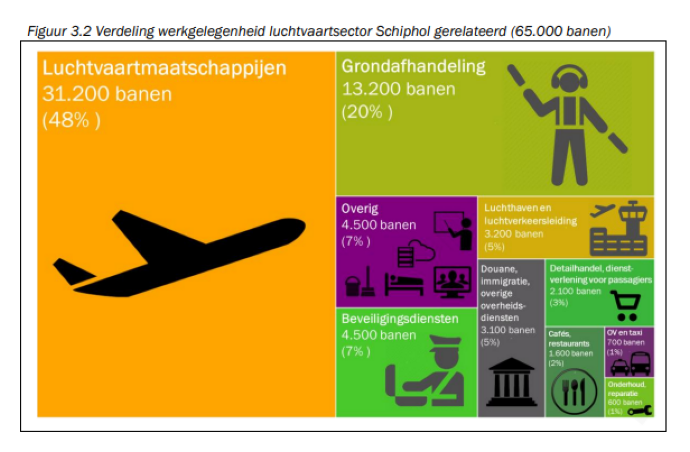

In [4]:
#@title
image_path = f'{images_path}banen.png'
image = Image.open(image_path)

# Display the image centered
plt.figure(figsize=(7, 7))
plt.imshow(image)
plt.axis('off')

# Automatically adjust spacing and center the image
plt.tight_layout()

# Show the plot
plt.show()

Maar dit is slechts het directe effect. Het indirecte effect van Schiphol is nog vele malen groter:

In [5]:
#@title
# read in the data
df = pd.read_csv(f'{data_path}directflight2022.csv')
df = df.dropna()
df = df.head(15)

#now using plotly
fig = px.bar(df, x='Airport', y='Direct Flights Per Week', color='Direct Flights Per Week', title='Top 15 Airports with Direct Flights 2022')

fig

Zoals hierboven te zien is, is Schiphol de grootste luchthaven als het aankomt op direct vluchten in Europa. Wereldwijd staat het zelfs op plek 3. (nummer) En stelt u nu eens voor dat u een van de grootste multinationals ter wereld bent en een kantoor wilt openen. Multinationals zoals MicroSoft, Samsung en Google vestigen zich in Amsterdam omdat er zo makkelijk naartoe gevlogen kan worden. Dankzij Schiphol is er een uitmuntend vestigingsklimaat in Nederland. Zakenlui vliegen vaak meer dan 2 keer per week de wereld rond en dan maakt elke minuut uit.(nummer) In een onderzoek is berekent dat minimaal 300.000 banen op termijn verloren zullen gaan als Schiphol zijn hub functie verliest.(nummer) Echter is het ook belangrijk om te melden om wat voor banen dit gaan. Dit gaat op de top van bedrijven. De hoogste functies die de meeste omzet maakt, de drijfveer van de economie hangt af van Schiphol;

In [6]:
#@title
#gooi hier plaatje van kaart NL en economische groei per regio: https://www.cbs.nl/item?sc_itemid=16d2c666-b672-445e-8e12-b5b421f56bac&sc_lang=nl-nl
# met afstanden tot schiphol:

# make a scatter of the third and second column. third column on the x axis. Also add a second and third polynomial trendline
df = pd.read_csv(f'{data_path}economischegroeiafstand.csv')
fig = px.scatter(df, x=df.columns[2], y=df.columns[1], trendline="ols", trendline_color_override="red")
fig.update_layout(title='Trendline Economische groei en afstand tot Schiphol tussen regio\'s', xaxis_title='Afstand tot Schiphol (km)', yaxis_title='Economische groei (%)')
#fig.update_yaxes(range=[1.2, 3.6])
fig.update_layout(
    title='Trendline Economische groei en afstand tot Schiphol tussen regio\'s',
    xaxis_title='Afstand tot Schiphol (km)',
    yaxis_title='Economische groei (%)',
    width=800,  # Set the width of the figure
    height=600  # Set the height of the figure
)
fig



# # kan ook als echte kaart ipv screenshot
# image_path = f'{images_path}economischegroeiperregio.png'
# image = Image.open(image_path)

# # Display the image centered
# plt.figure(figsize=(7, 7))
# plt.imshow(image)
# plt.axis('off')

# # Automatically adjust spacing and center the image
# plt.tight_layout()

# # Show the plot
# plt.show()

Dat Schiphol de drijfveer van de economie is wordt nogmaals bevestigd als we kijken naar de economische groei per regio, die is rond Schiphol het allergrootst. Hoe dichterbij Schiphol, hoe groter de economische groei. We mogen deze groei niet stoppen, dat zal indirect catastreus zijn voor een groot gedeelte van de Nederlanders.

### *Argument 2*

*   Toeristen

Het stijgende aantal vluchten laat zien dat Schiphol als een belangrijke internationale luchthaven fungeert, waardoor het land toegankelijker wordt voor toeristen van over de hele wereld. Deze toegenomen toeristenstroom resulteert in hogere bestedingen door toeristen, wat weer bijdraagt aan de economische groei, werkgelegenheid en investeringen in de toeristische sector.

In [7]:
#@title
# Read the CSV file
toerist_vliegverkeer_df = pd.read_csv(f'{data_path}vliegverkeer_toeristenuitgaven.csv')

# Read the data from the CSV file



# make a figure showing the 'Jaar' on the x -axis. Then also show the 'Totaal' on the y-axis and on another scaled y-axis 'Totale bestedingen'!
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter(
            name='Aantal vluchten op Schiphol',
            x=toerist_vliegverkeer_df['Jaar'],
            y=toerist_vliegverkeer_df['Totaal'],
            marker=dict(color='rgb(55, 83, 109)'),
            fill='tozeroy'
        ),
        go.Scatter(
            name='Totale uitgaven in miljoenen euro\'s door toeristen',
            x=toerist_vliegverkeer_df['Jaar'],
            y=toerist_vliegverkeer_df['Totale bestedingen'],
            yaxis='y2',
            mode='lines+markers',
            line=dict(color='rgb(26, 118, 255)'),
            fill='tonexty'
        )
    ],
    layout=dict(
        title='Vliegverkeer toeristen en totale uitgaven',
        yaxis=dict(
            title='Aantal vluchten op Schiphol',
            titlefont=dict(
                color='rgb(55, 83, 109)'
            ),
            tickfont=dict(
                color='rgb(55, 83, 109)'
            ),
            range=(0, 600),
            constrain='domain'
        ),
        yaxis2=dict(
            title='Totale uitgaven in miljoenen euro\'s door toeristen',
            titlefont=dict(
                color='rgb(26, 118, 255)'
            ),
            tickfont=dict(
                color='rgb(26, 118, 255)'
            ),
            overlaying='y',
            side='right',
            range=(0, 100000),
            constrain='domain'
        ),
        legend=dict(
            x=1,
            y=1,
            xanchor='right',
            yanchor='top',
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        paper_bgcolor='rgb(255, 255, 255)',
        plot_bgcolor='rgb(255, 255, 255)',
        height=600  # Set the height to 600 pixels
    )
)

fig



### *Argument 3*

*   Lage CO2 emissies ten opzichte van andere luchthavens:



In [8]:
df_carbon = pd.read_csv(f'{data_path}carbon_emission_per_passenger_per_km.csv')

fig = go.Figure(data=[
    go.Bar(
        x=df_carbon['Ranking'],
        y=df_carbon['Carbon emissions per passenger per kilometer'],
        hovertext=df_carbon[['Country', 'Carbon emissions per passenger per kilometer']],
        hovertemplate='Land: %{customdata}<br>CO2 emissies per passagier per kilometer: %{y}',
        customdata=df_carbon[['Country']],
        marker_color=['#7ABACC'] * 5 + ['red'] + ['#7ABACC'] * (len(df_carbon)-6)
    )
])

fig.update_layout(
    title='CO2 emissies per passagier per kilometer',
    xaxis_title='Rangschikking van de landen op basis van CO2 emissies per passagier per kilometer',
    yaxis_title='CO2 emissies per passagier per kilometer',
    hovermode='closest'
)

fig

---


## **Perspectief 2: Negatieve aspecten van de groei van Schiphol**


---

Er zijn meerdere redenen waarom de groei van Schiphol als negatief gezien wordt:

### *Argument 1*

*   Milieu vervuiling

Schiphol mag niet groeien vanwege de aanzienlijke toename van CO2- en NOx-uitstoot die gepaard gaat met uitbreiding. Deze emissies dragen bij aan klimaatverandering en luchtvervuiling, wat schadelijk is voor zowel het milieu als de gezondheid van omwonenden. Het beperken van de groei van Schiphol is essentieel om de negatieve impact op het milieu te verminderen..

In [9]:
#@title
### FIRST GRAPH: HEATMAP ###
# Read the CSV files
df_CO2 = pd.read_csv(f'{data_path}CO2.csv', sep=';')
df_NOx = pd.read_csv(f'{data_path}NOx.csv', sep=';')
df_flight = pd.read_csv(f'{data_path}flights.csv', sep=';')

# Merge the dataframes
df_merge = pd.merge(df_CO2, df_NOx, on='Jaar', how='outer')
df_merge = pd.merge(df_merge, df_flight, on='Jaar', how='outer')

# Remove rows with NaN values
df_merge = df_merge.dropna()

# Set the column names
df_merge.columns = ['Jaar', 'CO2', 'NOx', 'Handel', 'Bestemming', 'Totaal']

# Convert the data to numeric values
df_merge['CO2'] = df_merge['CO2'].str.replace(',', '.').astype(float)
df_merge['NOx'] = df_merge['NOx'].str.replace(',', '.').astype(float)
df_merge['Totaal'] = df_merge['Totaal'].str.replace(',', '.').astype(float)

# Calculate the correlation matrix
correlation_matrix = df_merge[['CO2', 'NOx', 'Totaal']].corr()

# Create a heatmap using Plotly
heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=['CO2', 'NOx', 'Totaal'],
    y=['CO2', 'NOx', 'Totaal'],
    colorscale='Viridis',
    showscale=True,
    colorbar=dict(title='Correlation')
)

# Create the layout for the heatmap
layout_heatmap = go.Layout(
    title='Correlation between CO2-emission and NOx-emission against Total flights'
)

# Create the figure with the heatmap
fig_heatmap = go.Figure(data=heatmap, layout=layout_heatmap)

# Show the heatmap
fig_heatmap.show()

# SECOND GRAPH

df_years = df_merge['Jaar'].astype(int)
df_Totaal = df_merge['Totaal']
df_NOx = df_merge['NOx']
df_CO2 = df_merge['CO2']

# Create the figure and axes
fig = go.Figure()

# Plot the Total flights data
fig.add_trace(go.Scatter(x=df_years, y=df_Totaal, name='Totale vluchten', mode='lines', line=dict(color='blue')))

# Create a second y-axis for the NOx-emission data
fig.update_layout(
    yaxis=dict(title='Totale vluchten op Schiphol'),
    yaxis2=dict(title='NOx-emissie', overlaying='y', side='right', anchor='free', position=0.15)
)

# Plot the NOx-emission data
fig.add_trace(go.Scatter(x=df_years, y=df_NOx, name='NOx-emissie', mode='lines', line=dict(color='green'), yaxis='y2'))

# Create a third y-axis for the CO2-emission data
fig.update_layout(
    yaxis3=dict(title='CO2-emissie', overlaying='y', side='right', anchor='free', position=0.85)
)

# Plot the CO2-emission data
fig.add_trace(go.Scatter(x=df_years, y=df_CO2, name='CO2-emissie', mode='lines', line=dict(color='red'), yaxis='y3'))

# Set the x-axis label
fig.update_layout(xaxis=dict(title='Years'))

# Set the title
fig.update_layout(title='CO2-emissie en NOx-emissie tegen de totale aantal vluchten per jaar')

# Show the plot
fig

### *Argument 2*

*   Geluidsoverlast

De kaart toont een duidelijk verband tussen het aantal vliegtuiggeluiden en het aantal mensen met slaaptekort, wat een sterk argument vormt tegen de groei van Schiphol.
Het benadrukt de negatieve impact van vliegtuiggeluid op de slaapkwaliteit en de gezondheid van omwonenden, en pleit voor maatregelen om de geluidsoverlast te verminderen in plaats van de groei van Schiphol te bevorderen.

In [10]:
#@title
def create_map():
    geluid_df = pd.read_csv(f'{data_path}GELUID_LUCHTVAART.csv', sep=";")
    grenzen_df = gpd.read_file(f'{data_path}Grenzen.json')
    slaap_df = pd.read_csv(f"{data_path}Slaapoverlast.csv", sep=";")

    # renaming and converting the geometry column for use
    geluid_df.rename(columns={'WKT_LNG_LAT': 'geometry'}, inplace=True)
    geluid_df['geometry'] = geluid_df['geometry'].apply(shapely.wkt.loads)

    # preparing the two datasets and converting them to Geopandas datasets
    slaap_gdf = grenzen_df.merge(slaap_df, 'inner', left_on="GEMEENTENAAM", right_on="Gemeente")
    geluid_gdf = gpd.GeoDataFrame(geluid_df, crs='epsg:4326')

    # renaming two columns for better readability on the final map
    geluid_gdf.rename(columns={'SELECTIE': "De gemiddelde geluidsbelasting in decibel over het etmaal, uitgedrukt in Lden",
                        'KLASSE': "decibel range"}, inplace=True)

    # instantiating the two maps
    my_map = slaap_gdf.explore("% dat ernstige slaapverstoring door vliegverkeer ervaart (2020)",
                       cmap="autumn",
                       min_zoom=10,
                       max_zoom=13,
                       height="50%",
                       width='100%',
                       name="slaapverstoring",
                       tooltip=["Gemeente", "% dat ernstige slaapverstoring door vliegverkeer ervaart (2020)"],
                       popup=["Gemeente", "% dat ernstige slaapverstoring door vliegverkeer ervaart (2020)", "Aantal respondenten 18-64 jaar (2020)"])

    geluid_gdf.explore("De gemiddelde geluidsbelasting in decibel over het etmaal, uitgedrukt in Lden",
                legend=True,
                m=my_map,
                min_zoom=10,
                max_zoom=13,
                height="50%",
                width='100%',
                name="geluidsbelasting",
                cmap='magma',
                tooltip=["decibel range"],
                popup=["decibel range"])

    # adding an extra background map and layer toggle ability
    folium.TileLayer('stamentoner').add_to(my_map)


    folium.LayerControl().add_to(my_map)

    # adding a marker to show where schiphol airport is
    my_map.add_child(
    folium.Marker(
        location=(52.308056, 4.764167),
        popup="<b>Schiphol<b>",
        tooltip="<b>Schiphol<b>",
        icon=folium.Icon(color="red", icon="plane"),
    )
)

    return my_map


# Call the function to create the map
my_map = create_map()

# Display the map using IPython display()
display(my_map)

---


## **4. Reflectie**


---

Na de evaluatie van de feedback van onze TA, hebben we besloten om ons onderwerp volledig te herzien.
Het oorspronkelijke onderwerp, dat zich richtte op migratie en de impact ervan op een land, bleek te breed te zijn om de negatieve effecten te bewijzen zonder uitgebreid literatuuronderzoek.
Daarom hebben we besloten om onze aandacht te richten op de groei van Schiphol.

---


## **5. Werkverdeling**


---


Als gemotiveerde studenten hebben we besloten dat we een optimaal systeem nodig hadden om onze prestaties te verbeteren. Als teambuildingactiviteit zijn we begonnen met boulderen om ervoor te zorgen dat iedereen elkaar kon leren kennen.

Foto van boulderen

Daarnaast hebben we een soort scrumsysteem gebruikt om het werk in balans te brengen en ervoor te zorgen dat iedereen zijn taken uitvoert.

Foto van sprint backlog